In [1]:
#importing the required library
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)

In [2]:
#Loading the csv file
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
# Determining the percentage of null value in given dataframe.
df2 = pd.DataFrame((df.isnull().sum()/len(df))*100, columns=['percentage'])

In [6]:
df2[df2['percentage'] > 15]

,percentage
LotFrontage,17.739726
Alley,93.767123
FireplaceQu,47.260274
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [7]:
# Dropping columns which have a null values greater than 50%.
df.drop(columns=['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [8]:
df2[df2['percentage'] > 0]

,percentage
LotFrontage,17.739726
Alley,93.767123
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [9]:
df[['MasVnrType',
    'MasVnrArea',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageQual',
    'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(2), object(11)
memory usage: 148.4+ KB


In [10]:
df[['MasVnrType',
    'MasVnrArea',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageQual',
    'GarageCond']]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [11]:
# Setting apart the categorical and numerical features, which are need to be imputed.
cat = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType', 
       'GarageFinish', 'GarageQual','GarageCond']
num = ['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

In [12]:
# finding the mode of categorical columns.
for i in cat:
    print(i) 
    cat_mode = df[i].mode()
    print(cat_mode)
    print(' ') 

MasVnrType
0    None
Name: MasVnrType, dtype: object
 
BsmtQual
0    TA
Name: BsmtQual, dtype: object
 
BsmtCond
0    TA
Name: BsmtCond, dtype: object
 
BsmtExposure
0    No
Name: BsmtExposure, dtype: object
 
BsmtFinType1
0    Unf
Name: BsmtFinType1, dtype: object
 
BsmtFinType2
0    Unf
Name: BsmtFinType2, dtype: object
 
Electrical
0    SBrkr
Name: Electrical, dtype: object
 
GarageType
0    Attchd
Name: GarageType, dtype: object
 
GarageFinish
0    Unf
Name: GarageFinish, dtype: object
 
GarageQual
0    TA
Name: GarageQual, dtype: object
 
GarageCond
0    TA
Name: GarageCond, dtype: object
 


In [13]:
 df.fillna({'BsmtQual': 'TA', 'BsmtCond':'TA', 
            'BsmtCond': 'No','BsmtExposure': 'No', 'BsmtFinType1':'Unf', 
            'BsmtFinType2': 'Unf','Electrical': 'SBrkr', 'GarageType':'Attchd', 
            'GarageFinish': 'Unf','GarageQual': 'TA', 'GarageCond' : 'TA'}, inplace=True)        

In [14]:
# finding the mean of all columns which are need to be imputed.
for i in num:
    print(i) 
    num_mean = df[i].mean()
    print(num_mean)
    print(' ') 

MasVnrArea
103.68526170798899
 
GarageYrBlt
1978.5061638868744
 
LotFrontage
70.04995836802665
 


In [15]:
 # Imputing the numerical column with its mean value.
    df.fillna({'MasVnrArea' : 103.68526170798899, 
            'GarageYrBlt': 1978.5061638868744,
            'LotFrontage': 70.04995836802665}, inplace=True) 

In [16]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
df[['OverallCond', 'OverallQual']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallCond  1460 non-null   int64
 1   OverallQual  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [18]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
# imputing the categorical variable
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['MSZoning'] = df.MSZoning.map({'RL':0,'RM':1,'FV':2,'RH':3, 'C (all)': 4})
df['Street'] = df.Street.map({'Pave':0,'Grvl':1})
df['LandContour'] = df.LandContour.map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})
df['Utilities'] = df.Utilities.map({'AllPub':0,'NoSeWa':1})
df['LotConfig'] = df.LotConfig.map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3, 'FR3': 4})
df['Condition1'] = df.Condition1.map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3, 'PosN': 4, 
                                   'RRAe':5,'PosA':6,'RRNn':7,'RRNn':8}) 
df['BldgType'] = df.BldgType.map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3, '2fmCon': 4})
df['HouseStyle'] = df.HouseStyle.map({'1Story':0,'2Story':1,'1.5Fin':2,'1.SLvl':3, 'SFoyer': 4, 
                                      '1.5Unf': 5,'2.5Unf': 6, '2.5Fin': 7})
df['RoofStyle'] = df.RoofStyle.map({'Gable':0,'Hip':1,'Flat':2,'Gambrel':3, 'Mansard': 4, 'Shed':5})
df['MasVnrType'] = df.MasVnrType.map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})
df['Foundation'] = df.Foundation.map({'PConc':0,'CBlock':1,'BrkTil':2,'Slab':3,'Stone': 4,'Wood': 5}) 
df['Heating'] = df.Heating.map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix': 4}) 
df['Electrical'] = df.Electrical.map({'GasA':0,'GasW':1,'Grav':2,'Wall':3,'OthW': 4,'Floor': 5}) 
df['SaleType'] = df.SaleType.map({'WD':0,'New':1,'COD':2,'ConLD':3,'ConLI': 4,'ConLw': 5, 
                                'CWD':6,'Oth': 7,'Con': 8}) 
df['SaleCondition'] = df.SaleCondition.map({'Normal':0,'Partial':1,'Partial':2,'Family':3,'Alloca': 4,'Alloca': 5})
df['Functional'] = df.Functional.map({'Typ':0,'Min2':1,'Min1':2,'Mod':3,'Maj1': 4,'Maj2': 5, 'Sev': 6})
df['GarageType'] = df.GarageType.map({'Attchd':0,'Detchd':1,'BuiltIn':2,'Basment':3,'CarPort': 4,'2Types': 5})
df['PavedDrive'] = df.PavedDrive.map({'Y':0,'N':1,'P':2})

In [21]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,3,0,0,0,0,CollgCr,0.0,Norm,0,1.0,7,5,2003,2003,0,CompShg,VinylSd,VinylSd,1.0,196.0,3,2,0,4,3.0,1,6,706,1,0,150,856,NaN,4,1,NaN,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,0,2003.0,2,2,548,3,3,0,0,61,0,0,0,0,0,2,2008,0,0.0,208500
1,20,0,80.0,9600,0,3,0,0,3,0,Veenker,1.0,Norm,0,0.0,6,8,1976,1976,0,CompShg,MetalSd,MetalSd,0.0,0.0,2,2,1,4,3.0,4,5,978,1,0,284,1262,NaN,4,1,NaN,1262,0,0,1262,0,1,2,0,3,1,2,6,0,1,0,1976.0,2,2,460,3,3,0,298,0,0,0,0,0,0,5,2007,0,0.0,181500
2,60,0,68.0,11250,0,0,0,0,0,0,CollgCr,0.0,Norm,0,1.0,7,5,2001,2002,0,CompShg,VinylSd,VinylSd,1.0,162.0,3,2,0,4,3.0,2,6,486,1,0,434,920,NaN,4,1,NaN,920,866,0,1786,1,0,2,1,3,1,3,6,0,1,0,2001.0,2,2,608,3,3,0,0,42,0,0,0,0,0,9,2008,0,0.0,223500
3,70,0,60.0,9550,0,0,0,0,1,0,Crawfor,0.0,Norm,0,1.0,7,5,1915,1970,0,CompShg,Wd Sdng,Wd Shng,0.0,0.0,2,2,2,3,4.0,1,5,216,1,0,540,756,NaN,3,1,NaN,961,756,0,1717,1,0,1,0,3,1,3,7,0,1,1,1998.0,1,3,642,3,3,0,0,35,272,0,0,0,0,2,2006,0,NaN,140000
4,60,0,84.0,14260,0,0,0,0,3,0,NoRidge,0.0,Norm,0,1.0,8,5,2000,2000,0,CompShg,VinylSd,VinylSd,1.0,350.0,3,2,0,4,3.0,3,6,655,1,0,490,1145,NaN,4,1,NaN,1145,1053,0,2198,1,0,2,1,4,1,3,9,0,1,0,2000.0,2,3,836,3,3,0,192,84,0,0,0,0,0,12,2008,0,0.0,250000


In [22]:
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [23]:
# Dropping the columns which are not required.
df.drop(columns=['Neighborhood','Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Heating',
                'YearRemodAdd', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 
                 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], inplace=True)

In [24]:
# Dropping the null values column
df.dropna(inplace=True)

In [25]:
#seperating X and y columns for model training.
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [26]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

MSSubClass         BldgType             0.792895
OverallQual        ExterQual            0.729339
                   BsmtQual             0.667662
                   KitchenQual          0.687395
                   GarageCars           0.616391
                   YrBltAndRemod        0.620195
ExterQual          BsmtQual             0.648429
                   KitchenQual          0.726730
                   YrBltAndRemod        0.662495
Foundation         GarageYrBlt         -0.628724
                   YrBltAndRemod       -0.693132
BsmtQual           GarageYrBlt          0.650501
                   YrBltAndRemod        0.735632
TotalBsmtSF        Total_sqr_footage    0.636135
GrLivArea          TotRmsAbvGrd         0.833154
                   Total_sqr_footage    0.784823
BedroomAbvGr       TotRmsAbvGrd         0.662724
KitchenQual        YrBltAndRemod        0.654511
GarageYrBlt        YrBltAndRemod        0.805917
GarageCars         GarageArea           0.879090
GarageQual         G

In [27]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
MSSubClass,1.000000,0.306834,-0.370114,-0.130614,0.029538,0.133276,-0.031798,NaN,-0.040640,-0.034786,-0.054338,0.792895,0.324563,0.034811,-0.073000,-0.102636,-0.009866,0.020043,0.036938,-0.062161,-0.038016,0.082967,-0.005358,0.004978,0.015305,-0.018027,-0.129768,-0.256206,-0.005422,-0.123474,0.025727,0.078192,-0.044074,0.277607,0.002245,0.033280,0.019071,-0.033035,0.130547,0.074756,-0.014358,-0.033062,-0.096103,0.024993,-0.034432,0.024074,-0.012763,-0.021180,-0.020595,-0.026755,0.011262,-0.019295,-0.086704,0.033484,-0.010104,0.140670,-0.031405
MSZoning,0.306834,1.000000,-0.231246,-0.162480,0.134163,0.232012,-0.000794,NaN,-0.074816,-0.018078,-0.034461,0.232734,0.179540,-0.080798,0.009982,-0.037803,-0.115825,-0.065400,-0.060597,-0.020594,0.079730,-0.081873,-0.071304,-0.115918,-0.133510,-0.065187,-0.031926,-0.256033,-0.028692,-0.215536,0.037362,-0.105113,-0.117219,0.102318,-0.075968,-0.125381,0.000016,-0.212417,0.193389,-0.062363,-0.157462,-0.094914,-0.067767,-0.062886,-0.081453,0.154379,-0.022259,-0.023935,0.022451,-0.017574,0.066138,0.063456,-0.185719,-0.119109,-0.191666,-0.134423,-0.077012
LotFrontage,-0.370114,-0.231246,1.000000,0.298068,0.039223,-0.148192,0.103775,NaN,0.045317,0.082973,0.085531,-0.303741,-0.110837,0.234711,-0.062348,0.140312,0.126477,0.185475,0.171339,-0.034168,-0.075708,0.180453,0.046281,0.172724,0.073458,-0.021751,0.124209,0.387624,0.092457,0.054010,-0.001323,0.361449,0.243408,-0.002341,0.171624,0.326563,-0.029892,0.219826,-0.079382,0.082787,0.214589,0.275847,0.329206,0.046959,0.032706,-0.057364,0.166860,0.001127,0.003578,0.002760,0.028645,0.099147,0.327288,0.122680,0.379995,0.202141,0.134408
LotArea,-0.130614,-0.162480,0.298068,1.000000,0.199178,-0.164056,0.360057,NaN,0.124592,0.478633,0.033811,-0.078832,-0.022990,0.102176,-0.002834,0.096738,0.072262,0.104952,0.048788,0.003915,0.014907,0.078667,0.023249,0.246684,0.058892,0.073022,-0.009456,0.271532,0.002824,0.041131,-0.000230,0.257738,0.119942,-0.016971,0.066169,0.187470,0.020331,0.268705,-0.022644,-0.025059,0.114837,0.148809,0.174500,0.021775,0.012707,0.003829,0.078817,0.041923,0.004011,-0.014252,-0.001324,0.004797,0.263062,0.010540,0.325167,0.204550,0.175496
Street,0.029538,0.134163,0.039223,0.199178,1.000000,0.011615,0.111240,NaN,-0.006302,0.198457,0.065379,0.085492,0.012429,-0.069005,-0.048242,0.008552,-0.018895,-0.019515,-0.110250,0.015795,0.032739,-0.027252,-0.002562,0.103223,-0.020678,0.085577,-0.042448,-0.012806,-0.051729,-0.083804,-0.007978,-0.050321,-0.032025,-0.012969,-0.073626,-0.052347,-0.015469,0.003215,0.164065,-0.029069,-0.011349,0.018356,0.048369,0.006405,0.007390,0.012836,-0.003369,0.023063,-0.003089,0.026528,0.031546,0.050415,-0.048762,-0.050489,-0.015850,-0.014063,0.018065
LotShape,0.133276,0.232012,-0.148192,-0.164056,0.011615,1.000000,-0.156575,NaN,-0.227936,-0.104214,-0.040535,0.157725,0.083121,-0.182563,0.017581,0.000755,-0.111471,-0.113724,-0.182391,-0.021835,0.133231,-0.200548,-0.048558,-0.161287,-0.097218,-0.020793,-0.028244,-0.170843,-0.089578,-0.103170,0.021609,-0.176052,-0.064369,0.072625,-0.162917,-0.131674,0.008255,-0.190717,0.082284,-0.188545,-0.234175,-0.177825,-0.157575,-0.086415,-0.095920,0.115427,-0.005766,-0.046316,-0.036243,0.037759,-0.001170,0.015744,-0.251684,-0.220473,-0.195446,-0.198729,-0.158561
LandContour,-0.031798,-0.000794,0.103775,0.360057,0.111240,-0.156575,1.000000,NaN,0.017214,0.589829

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [29]:
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [30]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns


## Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


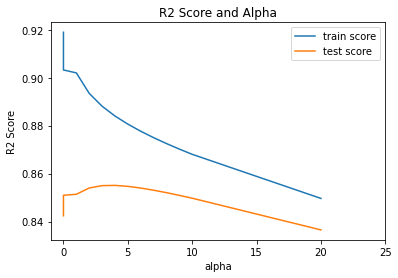

The optimum alpha is 4
The R2 Score of the model on the test dataset for optimum alpha is 0.8679848817865907
The MSE of the model on the test dataset for optimum alpha is 0.0009954334915027487


In [31]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [32]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
53,Total_sqr_footage,38107.41
31,GrLivArea,23067.79
27,TotalBsmtSF,17758.43
26,BsmtUnfSF,8481.45
30,LowQualFinSF,30.77


In [33]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


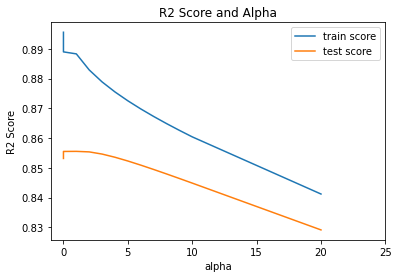

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8436783811798529
The MSE of the model on the test dataset for optimum alpha is 0.0011787117788127316


In [34]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [35]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

,Ridge Co-Efficient
OverallQual,0.150680
Total_Bathrooms,0.077448
TotRmsAbvGrd,0.077298
LotArea,0.061657
OverallCond,0.050075
GarageArea,0.048209
GarageCars,0.045955
Total_porch_sf,0.042586
Fireplaces,0.036753
YrBltAndRemod,0.031608


In [36]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8055236092736834
The MSE of the model on the test dataset for optimum alpha is 0.0014664101752543564


## Lasso Regression

Fitting 11 folds for each of 11 candidates, totalling 121 fits


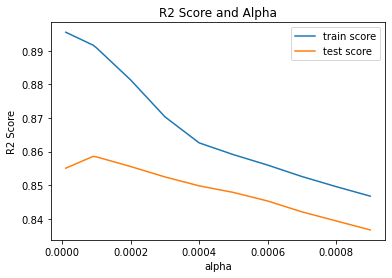

The optimum alpha is 9e-05
The R2 Score of the model on the test dataset for optimum alpha is 0.7989985222962438
The MSE of the model on the test dataset for optimum alpha is 0.0015156112834320717


In [37]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [38]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
OverallQual,0.171306
TotRmsAbvGrd,0.082627
Total_Bathrooms,0.078237
LotArea,0.070260
GarageArea,0.056832
OverallCond,0.046498
Total_porch_sf,0.040009
Fireplaces,0.037228
GarageCars,0.031538
YrBltAndRemod,0.028666


In [39]:
ridge_final2

Ridge(alpha=1, random_state=100)

In [40]:
lasso_final2

Lasso(alpha=9e-05, random_state=100)